## Minimally Invasive Surgery

In [2]:
from pycaret.classification import *
from sklearn.svm import SVC
import pandas as pd

In [3]:
# Read the file in
data = pd.read_csv("chart_minimal.csv")
data = data.iloc[:, 1:]

In [6]:
full_data = pd.read_csv("imputed6.csv")
full_data = full_data.iloc[:, 1:]

In [8]:
# List of covariates
covariates = ["age.at.admit", "gcs.initial", "wbc",
              "platelet", "hematocrit", "glucose",
              "creatinine", "sodium", "potassium",
              "diabetes", "anemia", "liver.disease",
              "depressive.disorder", "intraparenchymal",
              "died.before.90.days"]

In [10]:
# Only set data to hold these covariates
control = data[covariates]
full_data = full_data[covariates]

In [12]:
s = setup(data=control, target='died.before.90.days', session_id=125) # Deleted fix_imbalance = True
results = compare_models()

,Description,Value
0,Session id,125
1,Target,died.before.90.days
2,Target type,Binary
3,Original data shape,"(152, 15)"
4,Transformed data shape,"(152, 15)"
5,Transformed train set shape,"(106, 15)"
6,Transformed test set shape,"(46, 15)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8691,0.5617,0.0000,0.0000,0.0000,0.0000,0.0000,0.0530
dummy,Dummy Classifier,0.8691,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
knn,K Neighbors Classifier,0.8509,0.6272,0.0000,0.0000,0.0000,-0.0138,-0.0149,0.5350
et,Extra Trees Classifier,0.8509,0.5028,0.0000,0.0000,0.0000,-0.0200,-0.0200,0.0490
ridge,Ridge Classifier,0.8409,0.6056,0.0000,0.0000,0.0000,-0.0249,-0.0260,0.0080
lda,Linear Discriminant Analysis,0.8300,0.6211,0.1000,0.1000,0.1000,0.0597,0.0573,0.0090
gbc,Gradient Boosting Classifier,0.8227,0.6311,0.1000,0.1000,0.1000,0.0470,0.0435,0.0320
lr,Logistic Regression,0.8209,0.5778,0.0000,0.0000,0.0000,-0.0403,-0.0427,0.6230
lightgbm,Light Gradient Boosting Machine,0.8127,0.6900,0.0500,0.0500,0.0500,-0.0209,-0.0231,0.0560
dt,Decision Tree Classifier,0.8036,0.6117,0.3500,0.3083,0.2800,0.1869,0.2102,0.0080


In [16]:
light_model = create_model('lightgbm') # was svm before

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.6000,0.0000,0.0000,0.0000,-0.1379,-0.1491
1,0.8182,0.8000,0.0000,0.0000,0.0000,-0.1000,-0.1000
2,0.8182,0.8889,0.5000,0.5000,0.5000,0.3889,0.3889
3,0.8182,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7273,0.7222,0.0000,0.0000,0.0000,-0.1379,-0.1491
5,0.8182,0.8333,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8000,0.0000,0.0000,0.0000,0.0000,-0.1111,-0.1111
7,0.9000,0.8889,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


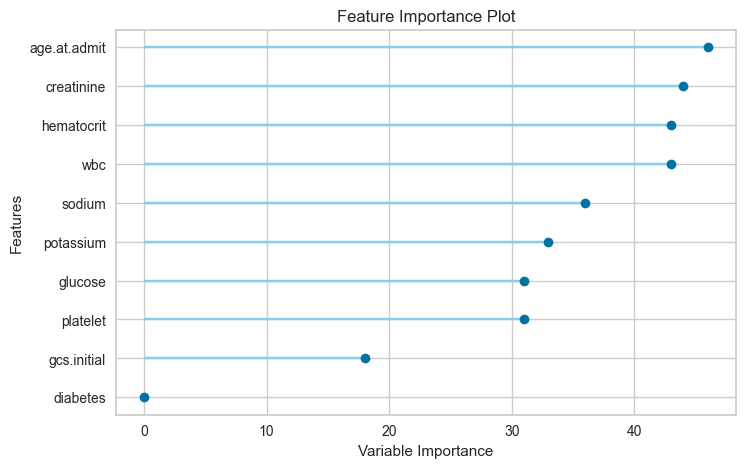

In [18]:
plot_model(light_model, plot = 'feature')

In [68]:
# predicted_values = 
predict_model(svm_model, data=full_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5461,0.5614,0.6253,0.4333,0.5119,0.1131,0.1198


,age.at.admit,gcs.initial,wbc,platelet,hematocrit,glucose,creatinine,sodium,potassium,diabetes,anemia,liver.disease,depressive.disorder,intraparenchymal,died.before.90.days,prediction_label
0,41.789310,7.0,12.423333,325.119995,37.081982,140.024994,1.003731,141.539993,3.963500,False,False,False,False,False,True,0
1,73.489479,11.0,12.486750,317.980011,37.877430,135.692505,1.008592,141.320007,3.850429,False,False,False,True,False,True,1
2,85.056221,11.0,6.600000,300.023346,34.799999,133.000000,0.800000,141.363174,3.925000,False,False,False,False,False,True,1
3,60.327812,14.0,11.300000,332.760010,26.500000,91.000000,0.300000,141.895004,3.988167,False,False,False,False,False,True,1
4,57.968899,4.0,12.800000,299.375824,37.299999,145.000000,0.800000,141.179993,3.946000,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,47.356281,6.0,12.983600,215.486664,39.317516,152.240005,0.940333,140.763336,3.990000,False,False,False,False,False,False,0
1307,58.303684,1.0,12.266000,230.500000,36.886501,190.690002,1.773000,141.264999,4.080454,True,False,False,False,True,False,0
1308,87.405403,4.0,11.659000,210.369995,37.317619,150.303329,0.872842,139.630005,3.534333,False,False,False,False,False,False,1
1309,57.764938,4.0,12.935667,320.040009,38.577251,142.278000,0.887556,141.210007,4.022200,False,False,False,False,False,False,0


In [23]:
predicted_values = predict_model(light_model, data=full_data)
predicted_values = predicted_values["prediction_score"]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6201,0.6319,0.1022,0.5050,0.1700,0.0480,0.0740


In [25]:
predicted_values.to_csv('minimal_predicted_probs_reg.csv')

In [77]:
# Run setup again
setup(data=control, target='died.before.90.days')

# Create the SVC model with probability enabled
custom_svc = SVC(probability=True)

# SPass it into PyCaret using 'create_model'
svm_model = create_model(custom_svc)

# This allows us to actually extract the probability
results = predict_model(svm_model, data=full_data)
probs = results['prediction_score'] 


,Description,Value
0,Session id,8166
1,Target,died.before.90.days
2,Target type,Binary
3,Original data shape,"(152, 15)"
4,Transformed data shape,"(152, 15)"
5,Transformed train set shape,"(106, 15)"
6,Transformed test set shape,"(46, 15)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.4000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9091,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8182,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8182,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8182,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8182,0.9444,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9000,0.4444,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.6194,0.3506,0.0000,0.0000,0.0000,0.0000,0.0000


In [81]:
probs.to_csv('minimal_predict_probs.csv')